In [1]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier


## 1.1 (a) Use leave-one-out cross-validation (LOOCV) to estimate the accuracy of the classifier and also to estimate the 3 × 3 confusion matrix.

In [19]:
data = np.loadtxt('wine.data',delimiter=',')

In [19]:
data = np.loadtxt('wine.data',delimiter=',')

In [20]:
data.shape

(178, 14)

In [21]:
x=data[:,1:14]
y=data[:,:1]

In [22]:
x.shape


(178, 13)

In [23]:
y.shape

(178, 1)

In [7]:
loo = LeaveOneOut()
loo.get_n_splits(x)

178

In [8]:
def squared_dist(x,y):
    return np.sum(np.square(x-y)) 
## Takes a vector x and returns the index of its nearest neighbor in train_data
def find_NN(x,train_data,train_labels):
    # Compute distances from x to every row in train_data
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return train_labels[np.argmin(distances)]

In [9]:
postive = []
confumatrix= []
for train_index, test_index in loo.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = find_NN(x_test,x_train,y_train)
    confumatrix.append(y_pred)
    if y_test == y_pred:
        postive.append(y_pred)
#print (postive/y.shape[0])
print(len(postive)/y.shape[0])
    # print(x_train, x_test, y_train, y_test)

0.7696629213483146


## confustion matrix 3*3




In [10]:
print(confusion_matrix(confumatrix, y))

[[52  5  3]
 [ 3 54 14]
 [ 4 12 31]]


## 1.1(b) Estimate the accuracy of the 1-NN classifier using k-fold cross-validation using 20 different choices of k that are fairly well spread out across the range 2 to 100. Plot these estimates: put k on the horizontal axis and accuracy estimate on the vertical axis.

In [11]:
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [12]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)

In [13]:
y_labels = y.ravel()
y_labels
x.shape
y_labels.shape

(178,)

In [14]:
kfold_list = [2,6,8,10,15,20,23,25,26,35,40,43,48,50,58,66,75,85,95,100]
accuracy = {}
for i in kfold_list:
    kf = KFold(n_splits=i)
    score = cross_val_score(knn_1, x, y_labels, scoring='accuracy', cv=kf)
    mean_score = np.mean(score)
    accuracy[i] = mean_score

In [15]:
accuracy

{2: 0.3314606741573034,
 6: 0.6492337164750959,
 8: 0.6561264822134387,
 10: 0.6767973856209151,
 15: 0.6823232323232323,
 20: 0.7180555555555554,
 23: 0.7336956521739131,
 25: 0.7392857142857142,
 26: 0.7307692307692307,
 35: 0.7552380952380954,
 40: 0.7537499999999999,
 43: 0.7558139534883721,
 48: 0.7447916666666666,
 50: 0.7483333333333334,
 58: 0.7543103448275862,
 66: 0.7525252525252526,
 75: 0.7644444444444444,
 85: 0.7647058823529411,
 95: 0.7684210526315789,
 100: 0.77}

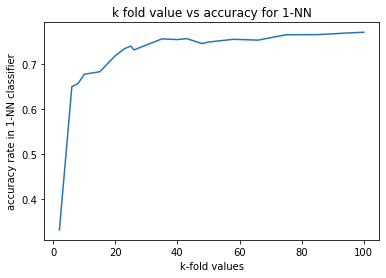

In [16]:
kfoldlist =  sorted(accuracy.items())
x , y = zip(*kfoldlist)
plt.xlabel('k-fold values')
plt.ylabel('accuracy rate in 1-NN classifier')
plt.title('k fold value vs accuracy for 1-NN')
plt.plot(x,y)
plt.show()

## 1.1.c)normalize them so as to equalize their contributions to the distance function. There are many ways to do this; one option is to linearly rescale each coordinate so that the values lie in [0,1] (i.e. the minimum value on that coordinate maps to 0 and the maximum value maps to 1). Do this, and then re-estimate the accuracy and confusion matrix using LOOCV. Did the normalization help performance?

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
x.shape

(178, 13)

In [25]:
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

# The normalized data increased the accuracy from 77% to 95%

In [26]:
postive = []
confumatrix_scale= []
for train_index, test_index in loo.split(x_scale):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x_scale[train_index], x_scale[test_index]
    y_train, y_test = y[train_index], y[test_index]
    y_pred = find_NN(x_test,x_train,y_train)
    confumatrix_scale.append(y_pred)
    if y_test == y_pred:
        postive.append(y_pred)
#print (postive/y.shape[0])
print(len(postive)/y.shape[0])

0.949438202247191


In [27]:
##add confustion matrix
confusion_matrix(confumatrix_scale, y)

array([[59,  5,  0],
       [ 0, 62,  0],
       [ 0,  4, 48]])

## 1.2a) Randomly partition the data into 200 training points and 103 test points. Fit a logistic regression model to the training data and display the coefficients of the model. If you had to choose the three features that were most influential in the model, what would they be?

In [28]:
heart = pd.read_csv('heart.csv',delimiter=',')

In [29]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
heart.shape

(303, 14)

In [31]:
x2=heart.iloc[:,0:13]

In [32]:
y2=heart.pop('target')

In [33]:
x2_=x2.values
y2_=y2.values

In [57]:
#Randomly partition the data into 200 training points and 103 test points. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [58]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2_, y2_, test_size = 103)

In [59]:
print(x2_test.shape)
print(y2_train.shape)
y2_test.shape

(103, 13)
(200,)


(103,)

In [60]:
clf = LogisticRegression(solver='liblinear')
y2_train.shape

(200,)

In [61]:
clf.fit(x2_train,y2_train)

LogisticRegression(solver='liblinear')

In [62]:
x2_train

array([[55.,  0.,  1., ...,  1.,  0.,  2.],
       [43.,  0.,  0., ...,  1.,  0.,  3.],
       [44.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [65.,  1.,  0., ...,  1.,  1.,  3.],
       [69.,  1.,  2., ...,  1.,  3.,  3.],
       [56.,  1.,  1., ...,  2.,  0.,  3.]])

In [63]:
pd.DataFrame(zip(x2.columns, np.transpose(clf.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,age,0.000897
1,sex,-1.914544
2,cp,0.752132
3,trestbps,-0.016628
4,chol,-0.006346
5,fbs,0.131375
6,restecg,0.654833
7,thalach,0.035689
8,exang,-0.531506
9,oldpeak,-0.597139


## three features that were most influential for -1 in the model would be sex,exang,and thal. The three features that were most influential for +1 class would be the cp,slope,and restecg.

In [64]:
f_3=np.argsort(clf.coef_)[:,[0,1,2]]
print('-1 top 3 features',f_3)
f_3_=np.argsort(clf.coef_)[:,[-1,-2,-3]]
print('+1 top 3 features',f_3_)


-1 top 3 features [[ 1 12  9]]
+1 top 3 features [[10  2  6]]


In [65]:
from sklearn.metrics import accuracy_score

## 1.2 (b) What is the test error of your model?
## check test error add predict 

In [66]:
score = clf.score(x2_test, y2_test)
error=1-score
print(error)


0.22330097087378642


## 1.2 (c) Estimate the error by using 5-fold cross-validation on the training set. How does this compare to the test error?
## -- the error rate by using 5 fold cross-validation is 18.5%. By using the last method, the error rate is 22.3%. The two method does not have too much difference.

In [67]:
kfold2 = KFold(n_splits= 5, shuffle=True)
kfold_score = cross_val_score(clf, x2_train, y2_train, scoring='accuracy', cv=kfold2)

In [68]:
kfold_error=1-(np.mean(kfold_score))
print(kfold_error)

0.18500000000000016


## 1.3 a) Use this procedure to find a k-sparse logistic regression solution for the heart disease data,
## for k = 1, 2, . . . , 13. Create a single plot showing the test error 
## and cross-validation error for all these values of k.

In [69]:
from sklearn.feature_selection import RFE


##
• Let S be empty (this is the set of chosen features)
• Repeat k times:
– For every feature f ̸∈ S:
∗ Estimate the error of a classifier based on features S ∪ {f }
– Select the feature f with the smallest error estimate
– Add this feature to S
• Now learn a model based only on features S

In [72]:

current_accuracy = cross_val_score(clf, x2_train[:,[2,0,7]], y2_train, scoring='accuracy', cv=5)
np.mean(current_accuracy)
x2_train.shape

(200, 13)

In [73]:
def sds(x_train,y_train,x_test,y_test,feature_number):
    s = []
    n = x_train.shape[1]
    clf = LogisticRegression(solver='liblinear')

    for k in range(feature_number):
        to_select = 0
        error = 1
        for i in range(n):
            if i not in s:
                current_index = s + [i]
                current_df = x_train[:,current_index]
                current_accuracy = cross_val_score(clf, current_df, y_train, scoring='accuracy', cv=5)
                current_error= 1-np.mean(current_accuracy)
                print(current_index, current_error)
                if current_error < error:
                    error=current_error
                    to_select = i
        if to_select not in s:
            s.append(to_select)
            print(to_select)
            
    clf.fit(x_train[:,s],y_train)        
    test_error = 1-clf.score(x_test[:,s], y_test)
    
    return s, error, test_error
    

In [74]:
sds(x2_train,y2_train,x2_test, y2_test,13)

[0] 0.38
[1] 0.365
[2] 0.265
[3] 0.4099999999999999
[4] 0.44999999999999996
[5] 0.48
[6] 0.3949999999999999
[7] 0.32499999999999996
[8] 0.30500000000000005
[9] 0.31500000000000006
[10] 0.275
[11] 0.29000000000000004
[12] 0.24
12
[12, 0] 0.24
[12, 1] 0.33000000000000007
[12, 2] 0.30000000000000004
[12, 3] 0.245
[12, 4] 0.235
[12, 5] 0.24
[12, 6] 0.32000000000000006
[12, 7] 0.24
[12, 8] 0.30500000000000005
[12, 9] 0.27000000000000013
[12, 10] 0.29000000000000004
[12, 11] 0.27500000000000013
4
[12, 4, 0] 0.2550000000000001
[12, 4, 1] 0.32000000000000006
[12, 4, 2] 0.29500000000000004
[12, 4, 3] 0.24
[12, 4, 5] 0.235
[12, 4, 6] 0.355
[12, 4, 7] 0.2300000000000001
[12, 4, 8] 0.30999999999999994
[12, 4, 9] 0.275
[12, 4, 10] 0.2849999999999999
[12, 4, 11] 0.29000000000000004
7
[12, 4, 7, 0] 0.24
[12, 4, 7, 1] 0.19499999999999995
[12, 4, 7, 2] 0.22499999999999998
[12, 4, 7, 3] 0.2450000000000001
[12, 4, 7, 5] 0.24
[12, 4, 7, 6] 0.22999999999999998
[12, 4, 7, 8] 0.24
[12, 4, 7, 9] 0.22499999999

([12, 4, 7, 1, 6, 3, 11, 2, 9, 10, 5, 0, 8],
 0.15000000000000002,
 0.22330097087378642)

In [75]:
test_error=sds(x2_train,y2_train,x2_test, y2_test,2)[2]
test_error

[0] 0.38
[1] 0.365
[2] 0.265
[3] 0.4099999999999999
[4] 0.44999999999999996
[5] 0.48
[6] 0.3949999999999999
[7] 0.32499999999999996
[8] 0.30500000000000005
[9] 0.31500000000000006
[10] 0.275
[11] 0.29000000000000004
[12] 0.24
12
[12, 0] 0.24
[12, 1] 0.33000000000000007
[12, 2] 0.30000000000000004
[12, 3] 0.245
[12, 4] 0.235
[12, 5] 0.24
[12, 6] 0.32000000000000006
[12, 7] 0.24
[12, 8] 0.30500000000000005
[12, 9] 0.27000000000000013
[12, 10] 0.29000000000000004
[12, 11] 0.27500000000000013
4


0.2815533980582524

In [76]:
features=[]
validation_error=[]
test_error=[]
for k in range(1,14):
    a,b,c = sds(x2_train,y2_train,x2_test, y2_test,k)
    features.append(a)
    validation_error.append(b)
    test_error.append(c)


[0] 0.38
[1] 0.365
[2] 0.265
[3] 0.4099999999999999
[4] 0.44999999999999996
[5] 0.48
[6] 0.3949999999999999
[7] 0.32499999999999996
[8] 0.30500000000000005
[9] 0.31500000000000006
[10] 0.275
[11] 0.29000000000000004
[12] 0.24
12
[0] 0.38
[1] 0.365
[2] 0.265
[3] 0.4099999999999999
[4] 0.44999999999999996
[5] 0.48
[6] 0.3949999999999999
[7] 0.32499999999999996
[8] 0.30500000000000005
[9] 0.31500000000000006
[10] 0.275
[11] 0.29000000000000004
[12] 0.24
12
[12, 0] 0.24
[12, 1] 0.33000000000000007
[12, 2] 0.30000000000000004
[12, 3] 0.245
[12, 4] 0.235
[12, 5] 0.24
[12, 6] 0.32000000000000006
[12, 7] 0.24
[12, 8] 0.30500000000000005
[12, 9] 0.27000000000000013
[12, 10] 0.29000000000000004
[12, 11] 0.27500000000000013
4
[0] 0.38
[1] 0.365
[2] 0.265
[3] 0.4099999999999999
[4] 0.44999999999999996
[5] 0.48
[6] 0.3949999999999999
[7] 0.32499999999999996
[8] 0.30500000000000005
[9] 0.31500000000000006
[10] 0.275
[11] 0.29000000000000004
[12] 0.24
12
[12, 0] 0.24
[12, 1] 0.33000000000000007
[12, 

In [77]:
features

[[12],
 [12, 4],
 [12, 4, 7],
 [12, 4, 7, 1],
 [12, 4, 7, 1, 6],
 [12, 4, 7, 1, 6, 3],
 [12, 4, 7, 1, 6, 3, 11],
 [12, 4, 7, 1, 6, 3, 11, 2],
 [12, 4, 7, 1, 6, 3, 11, 2, 9],
 [12, 4, 7, 1, 6, 3, 11, 2, 9, 10],
 [12, 4, 7, 1, 6, 3, 11, 2, 9, 10, 5],
 [12, 4, 7, 1, 6, 3, 11, 2, 9, 10, 5, 0],
 [12, 4, 7, 1, 6, 3, 11, 2, 9, 10, 5, 0, 8]]

In [78]:
validation_error

[0.24,
 0.235,
 0.2300000000000001,
 0.19499999999999995,
 0.18499999999999994,
 0.18999999999999984,
 0.17500000000000004,
 0.16500000000000004,
 0.15499999999999992,
 0.1299999999999999,
 0.1299999999999999,
 0.14500000000000013,
 0.15000000000000002]

In [79]:
test_error

[0.2815533980582524,
 0.2815533980582524,
 0.33009708737864074,
 0.3203883495145631,
 0.3495145631067961,
 0.33009708737864074,
 0.27184466019417475,
 0.2038834951456311,
 0.2038834951456311,
 0.2524271844660194,
 0.23300970873786409,
 0.23300970873786409,
 0.22330097087378642]

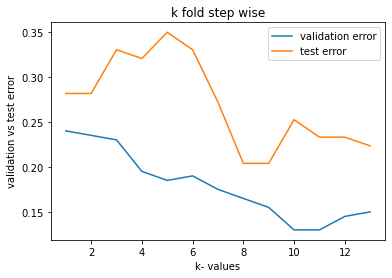

In [80]:
kvalue=np.arange(1,14)
plt.xlabel('k- values')
plt.ylabel('validation vs test error')
plt.title('k fold step wise')
plt.plot(kvalue,validation_error,label='validation error')
plt.plot(kvalue,test_error,label='test error')
plt.legend()
plt.show()

## 1.3 (b) What two features were chosen for k = 2? Plot the decision boundary in this case.
--the features were 2 and 3, sex and cp when k=2. 

In [81]:
sds(x2_train,y2_train,x2_test, y2_test,2)[0]


[0] 0.38
[1] 0.365
[2] 0.265
[3] 0.4099999999999999
[4] 0.44999999999999996
[5] 0.48
[6] 0.3949999999999999
[7] 0.32499999999999996
[8] 0.30500000000000005
[9] 0.31500000000000006
[10] 0.275
[11] 0.29000000000000004
[12] 0.24
12
[12, 0] 0.24
[12, 1] 0.33000000000000007
[12, 2] 0.30000000000000004
[12, 3] 0.245
[12, 4] 0.235
[12, 5] 0.24
[12, 6] 0.32000000000000006
[12, 7] 0.24
[12, 8] 0.30500000000000005
[12, 9] 0.27000000000000013
[12, 10] 0.29000000000000004
[12, 11] 0.27500000000000013
4


[12, 4]

## plot decision boundary


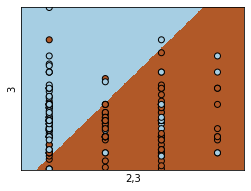

In [82]:
X =x2_train[:,[2,3]]
Y= y2_train

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired,shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('2,3')
plt.ylabel('3')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


## Mini-project: Coordinate descent

## (a) A short, high-level description of your coordinate descent method.
## In particular, you should give a concise description of how you solve problems (i) and (ii) above. Do
## you need the function L(·) to be differentiable, or does it work with any loss function?
## (i) Which coordinate to choose? (ii) How to set the new value of wi?


# chose the one to minimize the Wi. The cooridnate is i from 1 to k total 13 features, based on the different feature(i)
#  choose the one minimize the lost.

## how to set new value of wi
# first d(wi) take it out, use rest of w to estimate, then add the wi back , then esitmate agian, and 
# see what the influence of wi
# it's convex so it is differentiable. 


## (b) Convergence.
## Under what conditions do you think your method converges to the optimal loss? There’s no need to
## prove anything: just give a few sentences of brief explanation.

In [ ]:
## using cordinate decent, try to cyclic through the gradiant and find the optimal loss


In [83]:
from sklearn.metrics import log_loss

## (c) Experimental results.

In [84]:
x3=x2_
y3=y2_

In [85]:
reg =  LogisticRegression(solver='sag',max_iter = 10000).fit(x3,y3)

In [86]:
# base loss without regulization
base_loss = log_loss(y3,reg.predict_proba(x3))
base_loss

0.37123011201074485

In [87]:
x3

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [88]:
x3_norm=(x3-np.mean(x3,axis=0))/(np.max(x3,axis=0)-np.min(x3, axis=0))
x3_norm.shape

(303, 13)

In [89]:
intercept=np.ones((x3.shape[0],1))

In [90]:
intercept.shape

(303, 1)

In [91]:
x3_norm_=np.hstack((x3_norm,intercept))

In [92]:
x3_norm_.shape

(303, 14)

In [93]:
def coordi_descent(x, y, nbr_iterations,etha=0.01):
    
    w=np.zeros((x.shape[1],1))
    digit = 0
    loss=[]
    for i in range(nbr_iterations):
        current_index = digit % 13
        y_pred = 1 / (1+(np.exp(-(np.dot(w.T, x.T)))))
        current_loss = - (1/x.shape[0]) * np.sum(y * np.log(y_pred) + (1-y)*np.log(1-y_pred))
        
        gradient = list(np.dot((y_pred-y),x)[0]) 
        
        w[current_index] = w[current_index] - etha*gradient[current_index]
        digit = digit+1
        
        loss.append(current_loss)
        
    return loss 


In [94]:
loss = coordi_descent(x3_norm_,y3,5000)
min(loss)


0.34992040138143443

## Finally, compare to a method that chooses coordinates i uniformly at random and then updates
## wi using your method (we’ll call this “random-feature coordinate descent”)

In [95]:
def random_descent(x, y, nbr_iterations,etha=0.01):
    
    w=np.zeros((x.shape[1],1))
    loss=[]
    for i in range(nbr_iterations):
        current_index = np.random.randint(0,13)
        y_pred = 1 / (1+(np.exp(-(np.dot(w.T, x.T)))))
        current_loss = - (1/x.shape[0]) * np.sum(y * np.log(y_pred) + (1-y)*np.log(1-y_pred))
        
        gradient = list(np.dot((y_pred-y),x)[0]) 
        
        w[current_index] = w[current_index] - etha*gradient[current_index]
        
        loss.append(current_loss)
       
    return loss 


In [96]:
loss_random=random_descent(x3_norm_,y3,5000)
min(loss_random)

0.3499116775526019

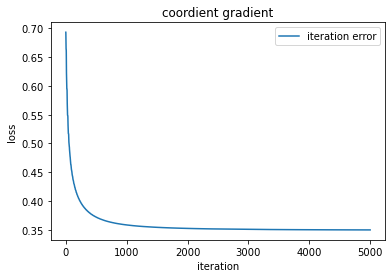

In [97]:
#Plotting and Showing the polts

iteration=np.arange(0,5000)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('coordient gradient')
plt.plot(iteration,loss,label='iteration error')
plt.legend()
plt.show()
